In [1]:
import pandas as pd
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import IsolationForest

df = pd.read_table('tuch_counts.csv',
                   names=('gene', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2'))

# Remove last row
df = df.drop(df.tail(1).index)

#Create copy of original df
df_orig = df.copy()

df

,gene,x1,y1,z1,x2,y2,z2
0,A2ML1,11731.0,13308.0,6944.0,912.0,3071.0,1160.0
1,A4GALT,162.0,111.0,751.0,296.0,362.0,182.0
2,AAAS,199.0,215.0,512.0,81.0,344.0,342.0
3,AACS,470.0,573.0,690.0,710.0,1112.0,728.0
4,AADACL1,97.0,153.0,245.0,154.0,369.0,242.0
...,...,...,...,...,...,...,...
10536,ZXDC,448.0,430.0,1021.0,386.5,659.5,866.5
10537,ZYG11B,754.0,931.0,1821.0,510.0,334.0,1214.0
10538,ZYX,725.0,417.0,2639.0,682.0,1333.0,1049.0
10539,ZZEF1,1692.0,1613.0,4649.0,1100.0,2397.0,3186.0


In [2]:
# Normalizacion de las coordenadas de los conjuntos 1 y 2
for index, col in df.iterrows():
    sumaCoor1 = col['x1'] + col['y1'] + col['z1']
    sumaCoor2 = col['x2'] + col['y2'] + col['z2']
    # Normalizar las coordenadas del primer conjunto
    df.at[index, 'x1'] = col['x1']/sumaCoor1
    df.at[index, 'y1'] = col['y1']/sumaCoor1
    df.at[index, 'z1'] = col['z1']/sumaCoor1
    # Normalizar las coordenadas del segundo conjunto
    df.at[index, 'x2'] = col['x2']/sumaCoor2
    df.at[index, 'y2'] = col['y2']/sumaCoor2
    df.at[index, 'z2'] = col['z2']/sumaCoor2

df

,gene,x1,y1,z1,x2,y2,z2
0,A2ML1,0.366789,0.416096,0.217115,0.177328,0.597122,0.225549
1,A4GALT,0.158203,0.108398,0.733398,0.352381,0.430952,0.216667
2,AAAS,0.214903,0.232181,0.552916,0.105606,0.448501,0.445893
3,AACS,0.271206,0.330641,0.398153,0.278431,0.436078,0.285490
4,AADACL1,0.195960,0.309091,0.494949,0.201307,0.482353,0.316340
...,...,...,...,...,...,...,...
10536,ZXDC,0.235914,0.226435,0.537651,0.202092,0.344837,0.453072
10537,ZYG11B,0.215060,0.265545,0.519395,0.247813,0.162293,0.589893
10538,ZYX,0.191748,0.110288,0.697964,0.222585,0.435052,0.342363
10539,ZZEF1,0.212723,0.202791,0.584486,0.164597,0.358671,0.476732


In [3]:
# Separar los datos en dos conjuntos de coordenadas
df1 = df[['x1', 'y1', 'z1']].copy()
df2 = df[['x2', 'y2', 'z2']].copy()

# Obtener las matrices de distancia entre las coordenadas de los conjuntos df1 y df2
euclidean_D = cdist(df1, df2, 'euclidean')
cityblock_D = cdist(df1, df2, 'cityblock')
minkowski_D = cdist(df1, df2, 'minkowski', p=3)
cosine_D = cdist(df1, df2, 'cosine')

# Extraer las distancias de la diagonal principal de las matrices
diag_euclidean = np.diagonal(euclidean_D)
diag_cityblock = np.diagonal(cityblock_D)
diag_minkowski = np.diagonal(minkowski_D)
diag_cosine = np.diagonal(cosine_D)

# Convertir los arreglos numpy a un DataFrame
df_dists = pd.DataFrame(zip(df['gene'],df_orig['x1'],df_orig['y1'],df_orig['z1'],df_orig['x2'],df_orig['y2'],df_orig['z2'],diag_euclidean, diag_cityblock, diag_minkowski, diag_cosine),
                            columns=['gene','x1','y1','z1','x2','y2','z2','euclidean_dist', 'cityblock_dist', 'minkowski_dist', 'cosine_dist'])
df_dists

,gene,x1,y1,z1,x2,y2,z2,euclidean_dist,cityblock_dist,minkowski_dist,cosine_dist
0,A2ML1,11731.0,13308.0,6944.0,912.0,3071.0,1160.0,0.262177,0.378920,0.233516,0.081438
1,A4GALT,162.0,111.0,751.0,296.0,362.0,182.0,0.639342,1.033464,0.563421,0.422821
2,AAAS,199.0,215.0,512.0,81.0,344.0,342.0,0.264941,0.432638,0.233028,0.085904
3,AACS,470.0,573.0,690.0,710.0,1112.0,728.0,0.154475,0.225327,0.137552,0.034492
4,AADACL1,97.0,153.0,245.0,154.0,369.0,242.0,0.248897,0.357219,0.221717,0.082335
...,...,...,...,...,...,...,...,...,...,...,...
10536,ZXDC,448.0,430.0,1021.0,386.5,659.5,866.5,0.149387,0.236803,0.132070,0.028520
10537,ZYG11B,754.0,931.0,1821.0,510.0,334.0,1214.0,0.129242,0.206503,0.114121,0.018557
10538,ZYX,725.0,417.0,2639.0,682.0,1333.0,1049.0,0.482570,0.711201,0.429534,0.245510
10539,ZZEF1,1692.0,1613.0,4649.0,1100.0,2397.0,3186.0,0.195514,0.311760,0.172694,0.045664


In [4]:
for index, col in df_dists.iterrows():
    df_dists.at[index, 'FE'] = (col['x2'] + col['y2'] + col['z2'])/(col['x1'] + col['y1'] + col['z1'])
for index, col in df_dists.iterrows():
    df_dists.at[index, 'log2(FE)'] = math.log2(col['FE'])
    
df_dists

,gene,x1,y1,z1,x2,y2,z2,euclidean_dist,cityblock_dist,minkowski_dist,cosine_dist,FE,log2(FE)
0,A2ML1,11731.0,13308.0,6944.0,912.0,3071.0,1160.0,0.262177,0.378920,0.233516,0.081438,0.160804,-2.636623
1,A4GALT,162.0,111.0,751.0,296.0,362.0,182.0,0.639342,1.033464,0.563421,0.422821,0.820312,-0.285754
2,AAAS,199.0,215.0,512.0,81.0,344.0,342.0,0.264941,0.432638,0.233028,0.085904,0.828294,-0.271786
3,AACS,470.0,573.0,690.0,710.0,1112.0,728.0,0.154475,0.225327,0.137552,0.034492,1.471437,0.557226
4,AADACL1,97.0,153.0,245.0,154.0,369.0,242.0,0.248897,0.357219,0.221717,0.082335,1.545455,0.628031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10536,ZXDC,448.0,430.0,1021.0,386.5,659.5,866.5,0.149387,0.236803,0.132070,0.028520,1.007109,0.010220
10537,ZYG11B,754.0,931.0,1821.0,510.0,334.0,1214.0,0.129242,0.206503,0.114121,0.018557,0.586994,-0.768583
10538,ZYX,725.0,417.0,2639.0,682.0,1333.0,1049.0,0.482570,0.711201,0.429534,0.245510,0.810368,-0.303352
10539,ZZEF1,1692.0,1613.0,4649.0,1100.0,2397.0,3186.0,0.195514,0.311760,0.172694,0.045664,0.840206,-0.251185


In [5]:
# TODO: Seleccionar los primeros 80 índices ordenados por sus diferentes distacnias
df_eucl_DOWN = df_dists.sort_values(by=['euclidean_dist']).tail(80)[['gene','log2(FE)','euclidean_dist']]
df_city_DOWN = df_dists.sort_values(by=['cityblock_dist']).tail(80)[['gene','log2(FE)','cityblock_dist']]
df_minkow_DOWN = df_dists.sort_values(by=['minkowski_dist']).tail(80)[['gene','log2(FE)','minkowski_dist']]
df_cos_DOWN = df_dists.sort_values(by=['cosine_dist']).tail(80)[['gene','log2(FE)','cosine_dist']]

In [6]:
dists = [df_eucl_DOWN, df_city_DOWN, df_minkow_DOWN, df_cos_DOWN]

for dist in dists:
    model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
    model.fit(dist[['log2(FE)']])
    
    dist['scores']=model.decision_function(dist[['log2(FE)']])u
    dist['anomaly']=model.predict(dist[['log2(FE)']])
    
# To filter results by anomaly:
# df_city_DOWN[(df_city_DOWN.anomaly == -1)]
df_eucl_DOWN

,gene,log2(FE),euclidean_dist,scores,anomaly
4320,ITGAM,-0.735949,0.731787,0.145186,1
4671,KRT13,-3.131189,0.734254,0.068598,1
322,ALOXE3,1.150825,0.737112,0.128987,1
393,ANKRD56,0.568843,0.737331,0.139533,1
4121,IFI44L,-0.327120,0.738967,0.152317,1
...,...,...,...,...,...
8171,SLITRK6,1.037199,0.968002,0.108729,1
1732,CEACAM7,-5.648657,1.015188,-0.116678,-1
7985,SLC11A1,-0.355159,1.058806,0.141708,1
6993,PTPRD,1.302850,1.060026,0.145938,1


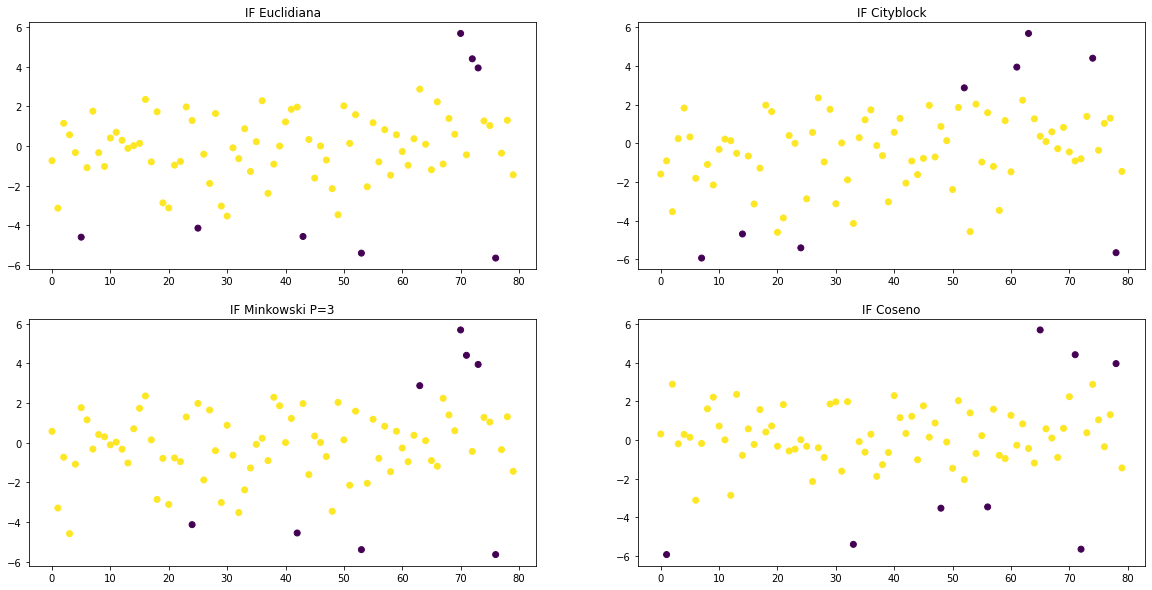

In [7]:
numbers = range(0, len(df_eucl_DOWN))

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(221)
plt.title('IF Euclidiana')
plt.scatter(numbers, df_eucl_DOWN['log2(FE)'], c=df_eucl_DOWN.anomaly)
plt.subplot(222)
plt.title('IF Cityblock')
plt.scatter(numbers, df_city_DOWN['log2(FE)'], c=df_city_DOWN.anomaly)
plt.subplot(223)
plt.title('IF Minkowski P=3')
plt.scatter(numbers, df_minkow_DOWN['log2(FE)'], c=df_minkow_DOWN.anomaly)
plt.subplot(224)
plt.title('IF Coseno')
plt.scatter(numbers, df_cos_DOWN['log2(FE)'], c=df_cos_DOWN.anomaly)

In [8]:
df_city_DOWN[(df_city_DOWN.anoumaly == -1)].gene.to_list()
df_city_DOWN[(df_city_DOWN.anomaly == -1)].gene.to_list()
df_city_DOWN[(df_city_DOWN.anomaly == -1)].gene.to_list()
df_city_DOWN[(df_city_DOWN.anomaly == -1)].gene.to_list()

['CA3', 'CASQ1', 'KRT76', 'TNFRSF18', 'HMGA2', 'SPP1', 'ANO1', 'CEACAM7']